In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.naive_bayes as nb
import pandas as pd
from PIL.ImageColor import colormap
from tensorflow.python.keras.metrics import Accuracy

# Load data
data = pd.read_csv('../../dataset/dataset_final.csv')

X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,Target
0,-4.362150,-1.007771,-2.563540,1.331845,-1.075936,-1.368674,-0.191537,-0.373345,-0.803115,0.837092,1.623067,-0.261753,0.235638,-0.326818,Dropout
1,-0.241665,-0.291954,-1.576865,-1.195618,1.024771,0.349829,-0.015485,-0.468722,-0.327269,0.175780,-2.409748,-0.823892,-0.581045,-0.973223,Graduate
2,-2.704703,0.883059,0.227150,-0.584111,-0.216966,-0.617850,0.370419,0.055970,-1.348930,-0.152507,-2.033690,0.099927,-1.232974,-0.678305,Dropout
3,0.366266,-0.237005,0.779684,-0.273035,-0.053979,-0.070852,-0.957714,-1.342641,-0.319636,-0.506683,-0.036937,1.136352,0.300461,-0.328121,Graduate
4,0.002403,2.173728,-0.855346,1.884833,1.329653,0.679385,-0.600227,-0.520670,0.723744,0.238530,0.123345,0.951798,-0.536999,0.329798,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6622,0.060873,-1.038330,-0.659588,-0.622870,0.090081,0.225687,0.144346,-0.735628,1.092355,-0.388809,-0.191486,-0.284427,-0.311598,-0.111791,Enrolled
6623,1.148948,-1.170207,-0.717351,-0.962082,0.870401,0.614360,0.009241,-0.920165,0.642480,0.390729,-0.037445,-0.035594,-0.211604,-0.474668,Enrolled
6624,-1.002743,0.146619,1.154968,-0.141683,-1.294870,-0.938337,0.429822,-0.098083,0.023849,-0.824973,0.271648,0.682401,0.797084,0.081801,Enrolled
6625,-0.388730,1.818346,0.501319,1.047079,0.424902,0.603358,-0.964207,-1.525201,0.314041,-0.649624,0.409576,0.568857,-0.749601,-0.016070,Enrolled


<AxesSubplot:xlabel='Target', ylabel='Count'>

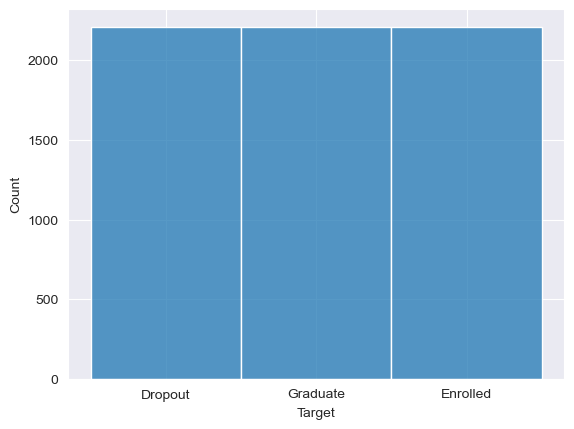

In [3]:
import seaborn as sns
#Plotting histogram of target
sns.histplot(data['Target'])

From the histogram, there presents an unbalanced distribution of the target classes.
Synthetic Minority Oversampling Technique (SMOTE) is used to equalise the counts per classes.


In [4]:
from sklearn.model_selection import train_test_split

# Splitting dataset to training, testing, validation
# 20% for testing - 10% for validation - 70% for training
X_train_val, X_test, y_train_val, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.12, random_state=42)
print("Total number of datapoints: "+str(X.shape[0]))
print("Number of datapoints in the training set: "+str(X_train.shape[0]))
print("Number of datapoints in the validation set: "+str(X_val.shape[0]))
print("Number of datapoints in the test set: "+str(X_test.shape[0]))

Total number of datapoints: 6627
Number of datapoints in the training set: 4664
Number of datapoints in the validation set: 637
Number of datapoints in the test set: 1326


Cross-Validation Step

Categorical NB classification


/Users/zhehaowang/.conda/envs/Pycharm test 1/lib/python3.9/site-packages/sklearn/naive_bayes.py:591: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


Maximum Value of accuracy: 0.33437990580847726
Alpha parameter corresponding to the max value: 4.404404404404405


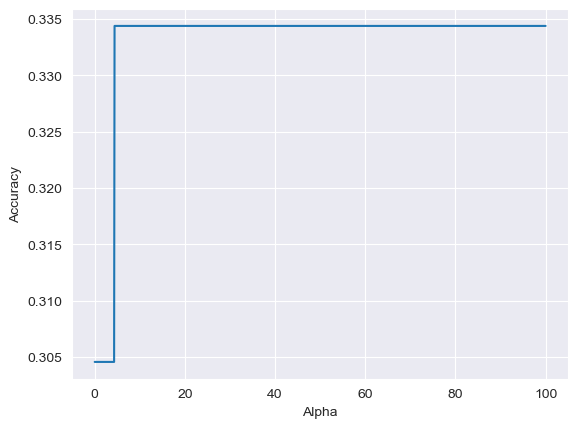

In [5]:
from sklearn.metrics import accuracy_score 

# to be able to use catergoical NB classifier, the variables need to be positive discrete
# this is done by using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
# Initialize OrdinalEncoder
encoder = OrdinalEncoder()
X_train_enc = encoder.fit_transform(X_train)
X_val_enc = encoder.fit_transform(X_val)
X_test_enc = encoder.fit_transform(X_test)

# Size of the array to contain values of the hyperparameter
N = 1000

# Hyperparameter: alpha, taking 1000 values between 0 and 100
alpha = np.linspace(0,100,N)
# array to store accuracies associated to each alpha
accuracies = np.zeros(len(alpha))

# Looping iterations to evaluate performance via accuracy for each alpha
for i in range(len(alpha)):
    # Define the model
    nb_model = nb.CategoricalNB(alpha = alpha[i])
    nb_model.fit(X_train_enc, y_train)
    y_pred = nb_model.predict(X_val_enc)
    accuracies[i] = accuracy_score(y_val, y_pred)

# visualise the relationship of the hyperparameter and accuracy
plt.plot(alpha, accuracies)
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

# Finding maximum value and its index, and its corresponded alpha (the first value of the maximum is taken)
max_value = np.max(accuracies)  # Maximum value
max_index = np.argmax(accuracies)  # Index of the maximum value
optimum_alpha_categorical = alpha[max_index] # chosen optimum alpha value after tuning the hyperparameter  
print(f"Maximum Value of accuracy: {max_value}")
print(f"Alpha parameter corresponding to the max value: {optimum_alpha_categorical}")       

Gaussian NB classification


Maximum Value of accuracy: 0.6436420722135008
var_smoothing parameter corresponding to the max value: 0.14514514514514515


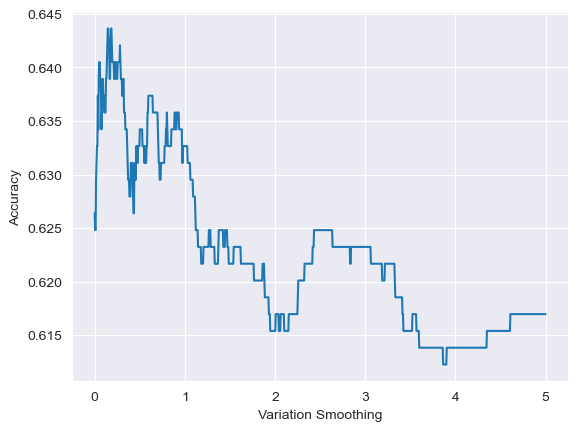

In [6]:
# Gaussian Naive Bayes. 
# tuning hyperparameter var_smoothing 
var_smooth = np.linspace(0,5,N)
accuracies = np.zeros(len(var_smooth))
for i in range(len(var_smooth)):
    # Define the model with a specific var_smoothing
    nb_model = nb.GaussianNB(var_smoothing = var_smooth[i])
    nb_model.fit(X_train, y_train)
    y_pred = nb_model.predict(X_val)
    accuracies[i] = accuracy_score(y_val, y_pred)
    
plt.plot(var_smooth, accuracies)
plt.xlabel('Variation Smoothing')
plt.ylabel('Accuracy')

# Finding maximum value and its index
max_value = np.max(accuracies)  # Maximum value
max_index = np.argmax(accuracies)  # Index of the maximum value
optimum_var_smooth = var_smooth[max_index]
print(f"Maximum Value of accuracy: {max_value}")
print(f"var_smoothing parameter corresponding to the max value: {optimum_var_smooth}")

The hyperparameter var_smoothing is an user-defined value to the variance of the distribution that widens the normal distribution curve and accounts for more samples that are further away from the distribution mean.


Bernoulli NB Classification


Maximum Value of accuracy: 0.6335770773069808
Binarise Threshold corresponding to the max value of accuracy: -0.25525525525525516
Maximum Value of accuracy: 0.6420722135007849
alpha parameter corresponding to the max value: 555.5555555555557


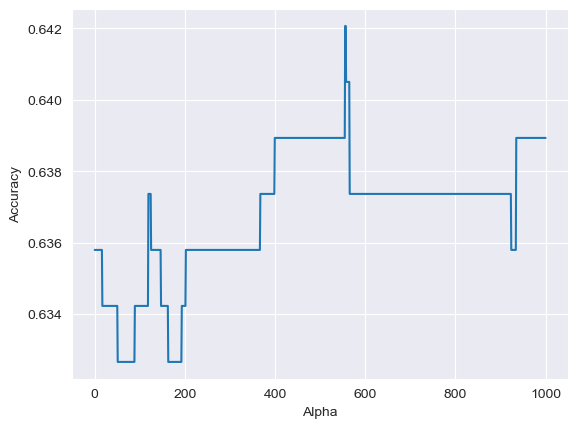

In [7]:
# Bernoulli NB
# Binarize data (using a threshold of 1.0)
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score

import warnings
# Suppress all warnings
warnings.filterwarnings("ignore")

# Binarisation operation, to assign 0 to values below a certain threshold and 1 for those above
thresholds = np.linspace(-5, 5, N)
acc = np.zeros(N)
# Performing cross validation for the threshold for binarisation
for t in range(len(thresholds)):
    binarizer = Binarizer(threshold=thresholds[t])
    X_binarized = binarizer.transform(X_train)
    model = nb.BernoulliNB()
    scores = cross_val_score(model, X_binarized, y_train,scoring = 'accuracy', cv=3)
    acc[t] = scores.mean()
    # print(f"Threshold: {t}, Accuracy: {scores.mean()}")

# Finding maximum value and its index of the binarize threshold
max_value = np.max(acc)  # Maximum value
max_index = np.argmax(acc)  # Index of the maximum value
optimum_threshold = thresholds[max_index]
print(f"Maximum Value of accuracy: {max_value}")
print(f"Binarise Threshold corresponding to the max value of accuracy: {optimum_threshold}")


# Performing binarisation on the train data using the optimum threshold
# Binarize data (using a threshold of 1.0)
binarizer = Binarizer(threshold=optimum_threshold)
X_binarized_train = binarizer.transform(X_train)

# Bernoulli model
# the range of alpha are chosen via trial and error
alpha = np.linspace(0,1000,N)
accuracies = np.zeros(len(alpha))
for i in range(len(alpha)):
    # Define the model
    nb_model = nb.BernoulliNB(alpha = alpha[i])
    nb_model.fit(X_binarized_train, y_train)
    X_binarized_val = binarizer.transform(X_val)
    y_pred = nb_model.predict(X_binarized_val)
    accuracies[i] = accuracy_score(y_val, y_pred)
    
plt.plot(alpha, accuracies)    
plt.xlabel('Alpha')
plt.ylabel('Accuracy')

# Finding maximum value and its index
max_value = np.max(accuracies)  # Maximum value
max_index = np.argmax(accuracies)  # Index of the maximum value
optimum_alpha_bernoulli = alpha[max_index]
print(f"Maximum Value of accuracy: {max_value}")
print(f"alpha parameter corresponding to the max value: {optimum_alpha_bernoulli}")

A relatively high value of alpha of 212 appeared to result in highest accuracy, which might have indicated the needing to help the model generalize better by assuming a small amount of "presence" for each feature in every class, even if it might not have been observed in the training data.


Model selection: determining the NB classifier at the optimum parameters of the best performance via accuracy


In [7]:
# Implementation
# accuracy on test dataset
# Categorical NB
model = nb.CategoricalNB(alpha = optimum_alpha_categorical)
model.fit(X_train_enc, y_train)
y_pred = model.predict(X_test_enc)
acc = accuracy_score(y_test, y_pred)
print(f"The performance of the CategoricalNB is: {acc}")

# Gaussian NB
model = nb.GaussianNB(var_smoothing = optimum_var_smooth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 
acc = accuracy_score(y_test, y_pred)
print(f"The performance of the GaussianNB is: {acc}")

# Bernoulli NB
model = nb.BernoulliNB(alpha=optimum_alpha_bernoulli)
binarizer = Binarizer(threshold=optimum_threshold)
X_binarized_train = binarizer.transform(X_train)
X_binarized_test = binarizer.transform(X_test)
model.fit(X_binarized_train, y_train)
y_pred = model.predict(X_binarized_test)
acc = accuracy_score(y_test, y_pred)
print(f"The performance of the BernoulliNB is: {acc}")

The performance of the CategoricalNB is: 0.3521870286576169
The performance of the GaussianNB is: 0.6304675716440422
The performance of the BernoulliNB is: 0.6168929110105581


It turns out that the Gaussian Naive Bayes classifier has the best performance in terms of accuracy rate.
This might have been due to the nature of the original feature variables where it works well with continuous,
potentially negative features, making it the best choice for PCA-transformed data.
The Categorical and Bernoulli classifiers (and potentially multinomial and complement) required encoding the continuous principal components
into positive discrete or binaries quantities before fitting the model which would have resulted in loss of information, making the performance, as expected, to be lower.

It is however, rather unexpected that the Bernoulli classifier has a accuracy rate close to that of Gaussian despite the use of binarization operation
with respect to a threshold value, which would result in loss of information.

===> It turns out that the BernoulliNB with a very high alpha to smooth the distributions of the classes, overcome the loss of information resulted from binarisation process.


Implementation of the ML model: 
Performance measures (Accuracy and F1 scores)

In [38]:
import seaborn as sns
# Gaussian NB
model = nb.GaussianNB(var_smoothing = optimum_var_smooth)
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

# Classification report produces the accuracy and f1 scores
from sklearn.metrics import classification_report
print("Classification Report for BernoulliNB:")
print(classification_report(y_test, y_pred, digits=4))

Classification Report for BernoulliNB:
              precision    recall  f1-score   support

     Dropout     0.7573    0.5270    0.6215       444
    Enrolled     0.5667    0.5809    0.5737       439
    Graduate     0.6120    0.7833    0.6871       443

    accuracy                         0.6305      1326
   macro avg     0.6453    0.6304    0.6274      1326
weighted avg     0.6456    0.6305    0.6276      1326



In [35]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
# Extract TPs, TNs, FPs, FNs for each class
n_classes = cm.shape[0]  # Number of classes
tps = np.diag(cm)  # Diagonal elements are True Positives
fps = cm.sum(axis=0) - tps  # Column sum minus TP
fns = cm.sum(axis=1) - tps  # Row sum minus TP
tns = cm.sum() - (fps + fns + tps)  # Total sum minus TP, FP, FN

print("True Positives (TPs):", tps)
print("False Positives (FPs):", fps)
print("False Negatives (FNs):", fns)
print("True Negatives (TNs):", tns)

Confusion Matrix:
 [[234 133  77]
 [ 41 255 143]
 [ 34  62 347]]
True Positives (TPs): [234 255 347]
False Positives (FPs): [ 75 195 220]
False Negatives (FNs): [210 184  96]
True Negatives (TNs): [807 692 663]


In [50]:
Accuracy = np.sum(np.diag(cm)) / np.sum(cm)
print("Accuracy Score:", Accuracy)
F1 = 2 * tps / (2 * tps + fps + fns)
print("F1 score:",F1)
print("Macro F1 averaged score:", np.mean(F1))

Accuracy Score: 0.6304675716440422
F1 score: [0.62151394 0.57367829 0.68712871]
Macro F1 averaged score: 0.6274403157693728
